## Binary Image Classification (Dogs and Cats) Using Sigoid Activation

### Setting Up

In [0]:
from __future__ import absolute_import, print_function, division, unicode_literals

In [0]:
try:
  %tensorflow_version 2.x
except:
  pass

import tensorflow as tf

TensorFlow 2.x selected.


In [0]:
from matplotlib import style
from tensorflow.keras.preprocessing.image import ImageDataGenerator

style.use('ggplot')

In [0]:
import os
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [0]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

### Data Loading

In [0]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file(fname='cats_and_dogs_filtered.zip', 
                                  origin=_URL, extract=True)

68608000/68606236 [==============================] - 1s 0us/step


In [0]:
zip_dir_base = os.path.dirname(zip_dir)
!find $zip_dir_base -type d -print

/root/.keras/datasets
/root/.keras/datasets/cats_and_dogs_filtered
/root/.keras/datasets/cats_and_dogs_filtered/train
/root/.keras/datasets/cats_and_dogs_filtered/train/dogs
/root/.keras/datasets/cats_and_dogs_filtered/train/cats
/root/.keras/datasets/cats_and_dogs_filtered/validation
/root/.keras/datasets/cats_and_dogs_filtered/validation/dogs
/root/.keras/datasets/cats_and_dogs_filtered/validation/cats


In [0]:
base_dir = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
print("{}\n".format(base_dir))

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
print("{}".format(train_dir))
print("{}\n".format(validation_dir))

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
print("{}".format(train_cats_dir))
print("{}\n".format(train_dogs_dir))

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
print("{}".format(validation_cats_dir))
print("{}".format(validation_dogs_dir))

/root/.keras/datasets/cats_and_dogs_filtered

/root/.keras/datasets/cats_and_dogs_filtered/train
/root/.keras/datasets/cats_and_dogs_filtered/validation

/root/.keras/datasets/cats_and_dogs_filtered/train/cats
/root/.keras/datasets/cats_and_dogs_filtered/train/dogs

/root/.keras/datasets/cats_and_dogs_filtered/validation/cats
/root/.keras/datasets/cats_and_dogs_filtered/validation/dogs


In [0]:
num_cats_train = len(os.listdir(train_cats_dir))
num_dogs_train = len(os.listdir(train_dogs_dir))

total_train = num_cats_train + num_dogs_train

num_cats_validation = len(os.listdir(validation_cats_dir))
num_dogs_validation = len(os.listdir(validation_dogs_dir))

total_validation = num_cats_validation + num_dogs_validation

print("Total training images   : {}".format(total_train))
print("Total validation images : {}".format(total_validation))

Total training images   : 2000
Total validation images : 1000


### Data Preparation

In [0]:
IMG_SIZE = 150
BATCH_SIZE = 100

In [0]:
train_image_gen = ImageDataGenerator(rescale=1./255)
validation_image_gen = ImageDataGenerator(rescale=1./255)

In [0]:
train_data_gen = train_image_gen.flow_from_directory(directory=train_dir, 
                                                     target_size=(IMG_SIZE, IMG_SIZE), 
                                                     class_mode='binary', 
                                                     batch_size=BATCH_SIZE, 
                                                     shuffle=True)

Found 2000 images belonging to 2 classes.


In [0]:
validation_data_gen = validation_image_gen.flow_from_directory(directory=validation_dir, 
                                                               target_size=(IMG_SIZE, IMG_SIZE), 
                                                               class_mode='binary', 
                                                               batch_size=BATCH_SIZE, 
                                                               shuffle=True)

Found 1000 images belonging to 2 classes.


### Visualizing Training Images

In [0]:
sample_training_images, _ = next(train_data_gen)
sample_training_images.shape

(100, 150, 150, 3)

In [0]:
def plot_images(images_arr):
  fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 15))
  axes = axes.flatten()

  for img, ax in zip(images_arr, axes):
    ax.imshow(img)
    ax.grid(False)
  plt.tight_layout()
  plt.show()

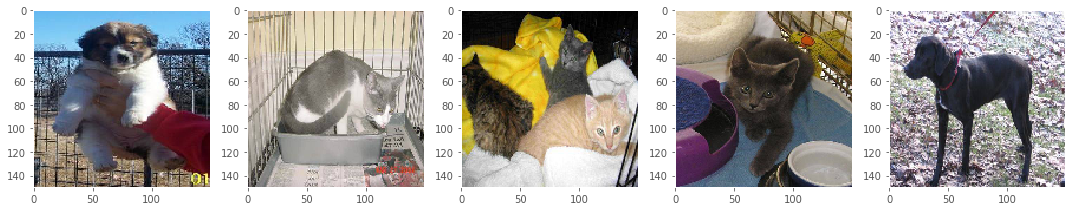

In [0]:
plot_images(images_arr=sample_training_images[:5])

### Model Creation

#### Build the Model

In [0]:
model_1 = tf.keras.Sequential([
  tf.keras.layers.Conv2D(filters=32, 
                         kernel_size=(3, 3), 
                         activation=tf.nn.relu, 
                         input_shape=(150, 150, 3)), 
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2), 

  tf.keras.layers.Conv2D(filters=64, 
                         kernel_size=(3, 3), 
                         activation=tf.nn.relu), 
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2), 

  tf.keras.layers.Conv2D(filters=128, 
                         kernel_size=(3, 3), 
                         activation=tf.nn.relu), 
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2), 

  tf.keras.layers.Conv2D(filters=128, 
                         kernel_size=(3, 3), 
                         activation=tf.nn.relu), 
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2), 

  tf.keras.layers.Flatten(), 
  tf.keras.layers.Dense(units=512, activation=tf.nn.relu), 
  tf.keras.layers.Dense(units=1, activation=tf.nn.sigmoid)
])

#### Compile the Model

In [0]:
model_1.compile(optimizer='adam', 
                loss='binary_crossentropy', 
                metrics=['accuracy'])

#### Model Summary

In [0]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [0]:
EPOCHS = 50
history = model_1.fit_generator(generator=train_data_gen, 
                                steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))), 
                                epochs=EPOCHS, 
                                validation_data=validation_data_gen, 
                                validation_steps=int(np.ceil(total_validation / float(BATCH_SIZE))))

Epoch 1/50
20/20 [==============================] - 12s 613ms/step - loss: 0.7181 - accuracy: 0.5135 - val_loss: 0.6908 - val_accuracy: 0.5200
Epoch 2/50
20/20 [==============================] - 8s 390ms/step - loss: 0.6897 - accuracy: 0.5415 - val_loss: 0.7123 - val_accuracy: 0.5000
Epoch 3/50
20/20 [==============================] - 8s 398ms/step - loss: 0.6835 - accuracy: 0.5420 - val_loss: 0.6412 - val_accuracy: 0.6290
Epoch 4/50
20/20 [==============================] - 7s 374ms/step - loss: 0.6657 - accuracy: 0.5855 - val_loss: 0.6438 - val_accuracy: 0.6310
Epoch 5/50
20/20 [==============================] - 7s 370ms/step - loss: 0.6563 - accuracy: 0.6030 - val_loss: 0.6459 - val_accuracy: 0.6250
Epoch 6/50
20/20 [==============================] - 7s 370ms/step - loss: 0.6289 - accuracy: 0.6390 - val_loss: 0.6196 - val_accuracy: 0.6350
Epoch 7/50
20/20 [==============================] - 7s 370ms/step - loss: 0.5952 - accuracy: 0.6825 - val_loss: 0.6143 - val_accuracy: 0.6690
Epoch

In [0]:
acc = history.history['accuracy']
loss = history.history['loss']

val_accuracy = history.history['val_accuracy']
val_loss = history.history['val_loss']

data = {
    'train_acc' : acc, 
    'train_loss' : loss, 
    'val_accuracy' : val_accuracy, 
    'val_loss' : val_loss
    }

history_df = pd.DataFrame(data=data, index=history.epoch)
print(len(history_df))
display(history_df.head(10))
display(history_df.tail(10))

50


,train_acc,train_loss,val_accuracy,val_loss
0,0.5135,0.718144,0.520,0.690839
1,0.5415,0.689735,0.500,0.712253
2,0.5420,0.683489,0.629,0.641153
3,0.5855,0.665668,0.631,0.643757
4,0.6030,0.656290,0.625,0.645901
5,0.6390,0.628858,0.635,0.619617
6,0.6825,0.595198,0.669,0.614298
7,0.7195,0.537974,0.731,0.556990
8,0.7595,0.495891,0.721,0.553224
9,0.7715,0.478323,0.715,0.575740


,train_acc,train_loss,val_accuracy,val_loss
40,1.0,0.000133,0.753,1.767283
41,1.0,0.000123,0.753,1.776011
42,1.0,0.000114,0.754,1.784504
43,1.0,0.000107,0.753,1.790378
44,1.0,0.000100,0.754,1.799987
45,1.0,0.000094,0.753,1.806493
46,1.0,0.000087,0.754,1.812999
47,1.0,0.000082,0.753,1.818433
48,1.0,0.000075,0.754,1.827733
49,1.0,0.000069,0.755,1.833014


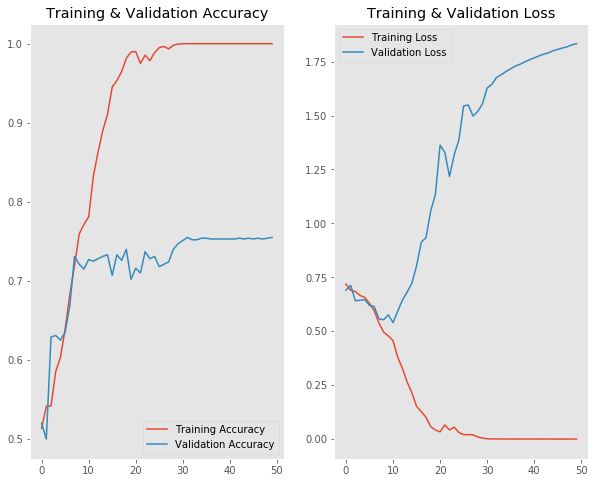

In [0]:
plt.figure(figsize=(10, 8))

plt.subplot(1, 2, 1)
plt.title("Training & Validation Accuracy")
plt.plot(history_df.index, history_df['train_acc'], label="Training Accuracy")
plt.plot(history_df.index, history_df['val_accuracy'], label="Validation Accuracy")
plt.grid(False)
plt.legend()

plt.subplot(1, 2, 2)
plt.title("Training & Validation Loss")
plt.plot(history_df.index, history_df['train_loss'], label="Training Loss")
plt.plot(history_df.index, history_df['val_loss'], label="Validation Loss")
plt.grid(False)
plt.legend()

plt.savefig('./foo.png')
plt.show()